# 종합실습2 이변량분석(y-숫자) : car seat 매출 분석

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

### (2) 데이터 로딩

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|



In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


In [3]:
target = 'Sales'

## 1.숫자형 X --> Y

* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

### (1) Advertising -> Sales

1) 시각화 : scatter(regplot), jointplot

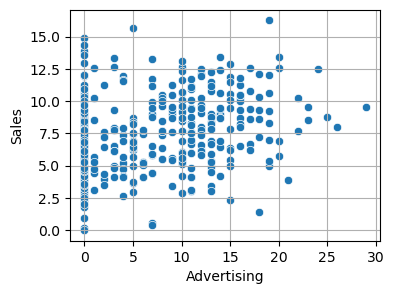

In [9]:
var = 'Advertising'

plt.figure(figsize= (4, 3))
sns.scatterplot(x=var, y = target, data = data)
plt.grid()
plt.show()

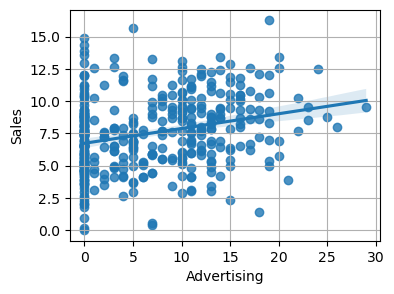

In [10]:
plt.figure(figsize= (4, 3))
sns.regplot(x=var, y = target, data = data)
plt.grid()
plt.show()

<Figure size 400x300 with 0 Axes>

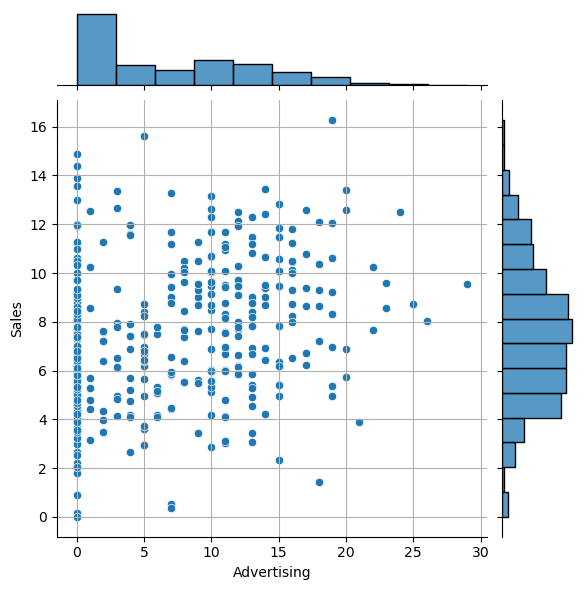

In [11]:
plt.figure(figsize= (4, 3))
sns.jointplot(x=var, y = target, data = data)
plt.grid()
plt.show()

2) 수치화 : 상관분석

In [7]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.269506781376902, p-value : 4.377677110302732e-08


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

    관계가 있긴 있으나, 0을 빼고 다시 해봐야 된다.
    pvalue로 볼 때 유의미한 값으로 판단됨.
    상관계수만으로는 중간정도의 관계가 있다.

In [54]:
def eda_n(data, var, target = 'Sales'):
    plt.figure(figsize= (12, 3))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=var, y = target, data = data)
    plt.grid()
    
    plt.subplot(1, 2, 2)
    sns.regplot(x=var, y = target, data = data)
    plt.grid()
    
    # plt.figure(figsize= (6, 3))
    # sns.jointplot(x=var, y = target, data = data)
    # plt.grid()
    
    plt.show()
    
    result = spst.pearsonr(data[var], data[target])
    print(f'상관계수 : {result[0]}, p-value : {result[1]}')

### (2) Population -> Sales

1) 시각화 : scatter
2) 수치화 : 상관분석

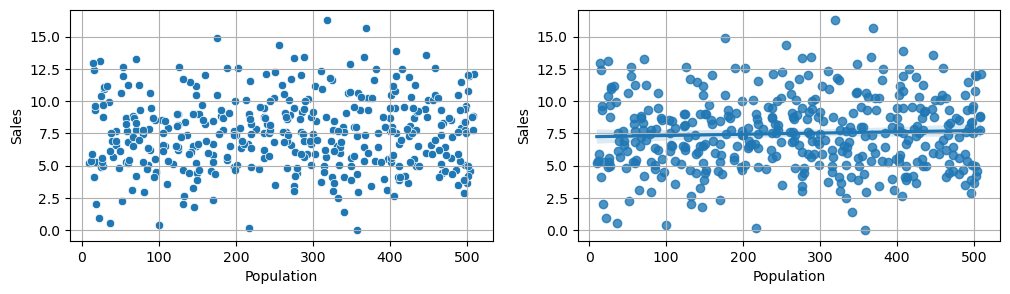

<Figure size 600x300 with 0 Axes>

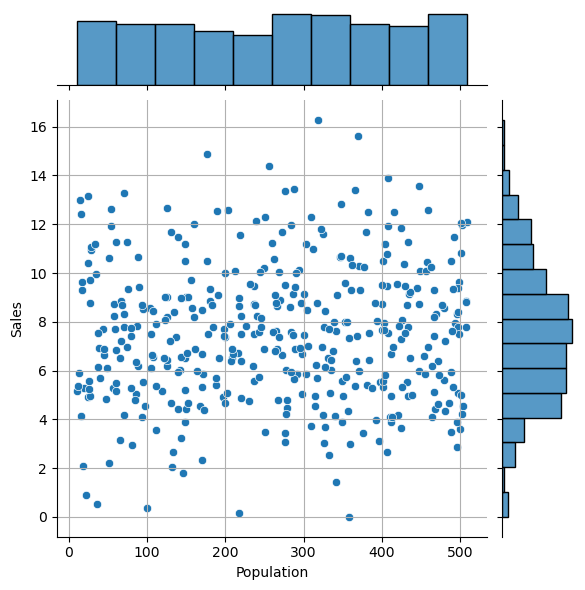

상관계수 : 0.0504709844720392, p-value : 0.31398160931903


In [22]:
eda_n(data, 'Population')

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

    Population과 Sales의 상관계수는 0.0505이므로 상관 관계가 거의 없다.
    단, p_value가 0.31이므로, 'Population'과 'Sales'간의 관계가 없다고 판단 된다.

### (3) Price -> Sales

1) 시각화 : scatter
2) 수치화 : 상관분석

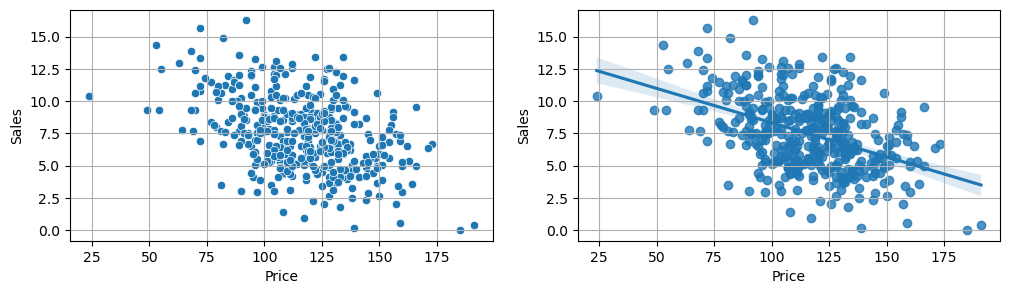

<Figure size 600x300 with 0 Axes>

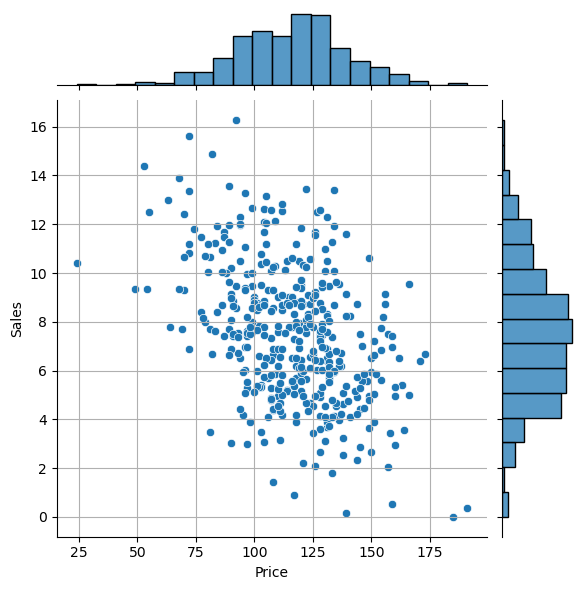

상관계수 : -0.4449507278465726, p-value : 7.61818701191294e-21


In [24]:
eda_n(data, 'Price')

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

    상관계수로만 볼 때, 0.445로 중간 정도의 관계를 보인다.
    p_value도 0으로 수렴하기 때문에, 'Price'와 'Sales'는 관련성이 있다고 판단 된다.

### (4) Age -> Sales

1) 시각화 : scatter
2) 수치화 : 상관분석

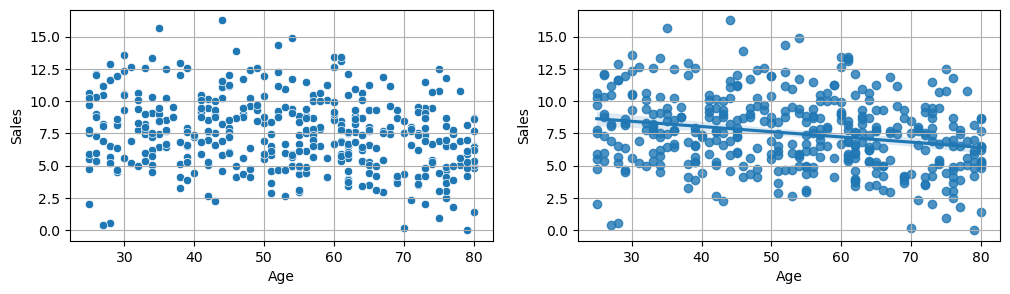

<Figure size 600x300 with 0 Axes>

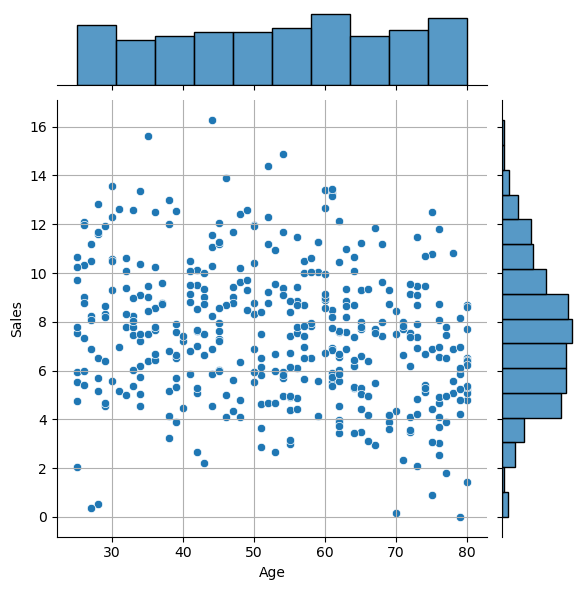

상관계수 : -0.2318154396045765, p-value : 2.7889498393711916e-06


In [25]:
eda_n(data, 'Age')

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

    상관계수 |r| = 0.232로 중간 정도의 관계가 있다고 판단되고,
    p_value도 2.789e-06으로 0에 근사한 수치이기 때문에 'Age'와 'Sales'는 관계가 있다고 판단된다.
    나이를 구분(60세 이하, 60세 이상)해서 구간별로 차이가 있는지 추가 확인 할 필요가 있다.

### (5) CompPrice -> Sales

1) 시각화 : scatter
2) 수치화 : 상관분석

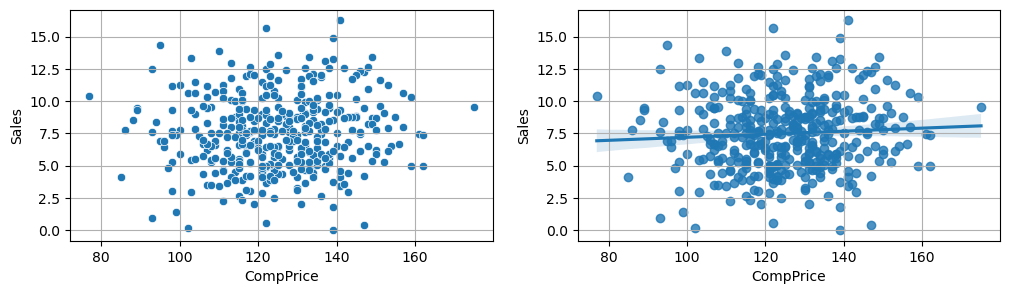

<Figure size 600x300 with 0 Axes>

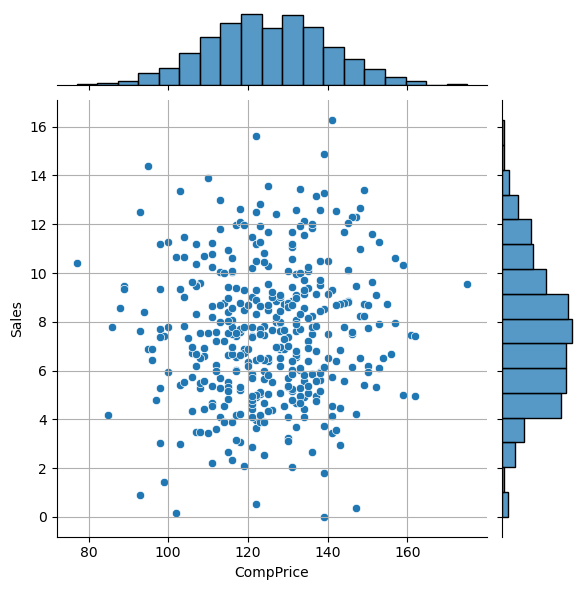

상관계수 : 0.06407872955062152, p-value : 0.2009398289418295


In [26]:
eda_n(data, 'CompPrice')

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

    상관계수 |r| = 0.064로 관계가 (거의) 없다고 판단되고,
    p_value도 0.201로, 'CompPrice'와 'Sales'는 관계가 없다고 판단된다.
    즉, 가설이 잘 못 됐다. 가설을 업데이트 해야한다.
    ex) 타사 가격 -> 가격 경쟁력(타사 - 자사)

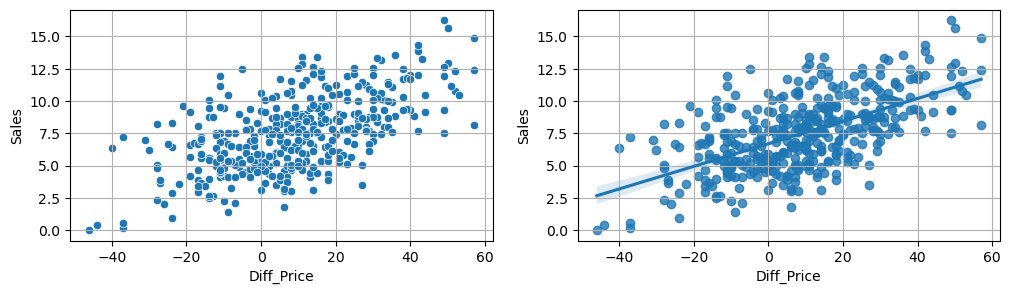

상관계수 : 0.5979217124533921, p-value : 3.877120641788835e-40


In [55]:
# 드디어 함께 추가 분석
data['Diff_Price'] = data['CompPrice'] - data['Price']
data.head()

eda_n(data, 'Diff_Price')

### (6) Income -> Sales

1) 시각화 : scatter
2) 수치화 : 상관분석

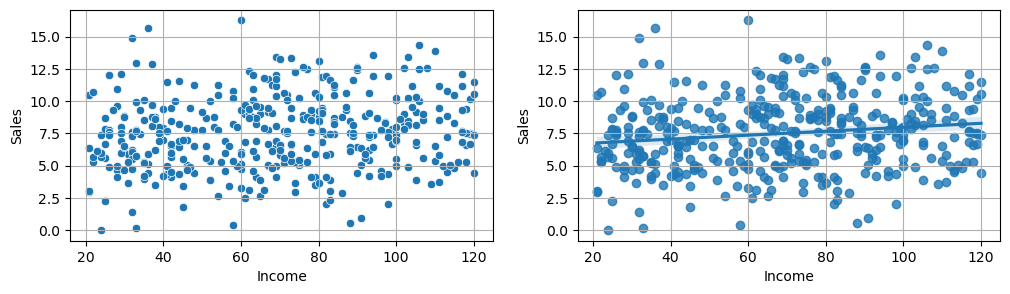

상관계수 : 0.15195097946754424, p-value : 0.0023096704539517627


In [56]:
eda_n(data, 'Income')

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

    상관계수 |r| = 0.152로 약한 관계가 있다고 판단되고,
    p_value도 0.002로, 'Income'와 'Sales'는 관계가 약하게 있다고 판단된다.

## 2.범주형 X --> Y

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

### (1) ShelveLoc-> Sales

1) 시각화 : 평균비교 barplot

<class 'numpy.ndarray'>


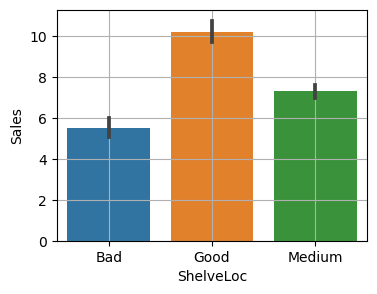

In [31]:
var = 'ShelveLoc'
order_index = data[var].unique()
print(type(order_index))
plt.figure(figsize= (4, 3))
# sns.barplot(x=var, y=target, data = data, order = ['Bad', 'Medium', 'Good'])
sns.barplot(x=var, y=target, data = data, order = order_index)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [30]:
d_b = data.loc[data[var]=='Bad', target]
d_m = data.loc[data[var]=='Medium', target]
d_g = data.loc[data[var]=='Good', target]

print(type(d_b))

spst.f_oneway(d_b, d_m, d_g)

<class 'pandas.core.series.Series'>


F_onewayResult(statistic=92.22990509910348, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

    진열된 상태에 따라 매출량이 확실한 차이가 있다.

In [43]:
def eda_r(data, var, target = 'Sales'):
    order_index = data[var].unique()
    len_o_i = len(order_index)
    plt.figure(figsize= (4, 3))
    # sns.barplot(x=var, y=target, data = data, order = ['Bad', 'Medium', 'Good'])
    sns.barplot(x=var, y=target, data = data, order = order_index)
    plt.grid()
    plt.show()
    
    if len_o_i > 2:
        d_a = data.loc[data[var]== order_index[0], target]
        d_b = data.loc[data[var]== order_index[1], target]
        d_c = data.loc[data[var]== order_index[2], target]
        
        print(f'ANOVA: {spst.f_oneway(d_a, d_b, d_c)}')
    elif len_o_i == 2:
        d_y = data.loc[data[var]== order_index[0], target]
        d_n = data.loc[data[var]== order_index[1], target]
        
        print(f'T test: {spst.ttest_ind(d_y, d_n)}')

### (2) Urban -> Sales

1) 시각화 : 평균비교 barplot
2) 수치화 : t-test, anova

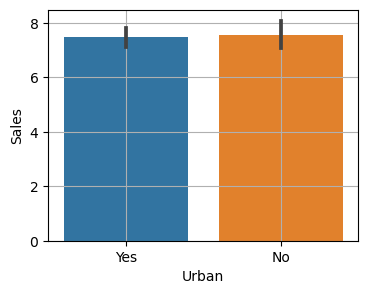

T test: Ttest_indResult(statistic=-0.30765346670661126, pvalue=0.7585069603942775)


In [44]:
eda_r(data, 'Urban')

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

    'Urban'과 'Sales'는 관련이 없다, 차이가 없다.

### (3) US-> Sales

1) 시각화 : 평균비교 barplot
2) 수치화 : t-test, anova

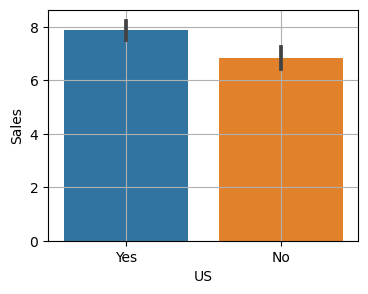

T test: Ttest_indResult(statistic=3.589738747802499, pvalue=0.00037233958701471517)


In [45]:
eda_r(data, 'US')

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

    'US'와 'Sales'는 관련이 있다, 차이가 있다.

## 3.관계 정리하기

① 강한관계

    ShelveLoc
    Diff_Price

② 중간관계

    Advertising
    Price
    Age
    Income
    US


③ 관계없음

    Population
    CompPrice
    Urban
    